In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes_2.geojson')
print(zipcodes.crs)
zipcodes.head()

EPSG:4326


,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37015,ASHLAND CITY,None,21,{2AB8F204-63EE-49A4-A806-8E1DAE1C32AA},None,None,None,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
1,37143,PEGRAM,None,23,{B142BE7A-6E4F-4325-95C5-A1C980D46F37},None,None,None,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
2,37072,GOODLETTSVILLE,None,46,{FD866D5C-A196-4C6E-9CFF-A04FD08B1657},None,None,None,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
3,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
4,37015,ASHLAND CITY,None,20,{49D81E1C-5F08-414E-AED7-8C8F9714DD83},None,None,None,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
zipcodes = zipcodes[['zipcode','poname', 'geometry']]
zipcodes.head()

,zipcode,poname,geometry
0,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
1,37143,PEGRAM,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
2,37072,GOODLETTSVILLE,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
3,37189,WHITES CREEK,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
4,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


In [6]:
public_water = pd.read_csv('../data/water_csv.csv')
print(public_water.shape)
public_water.head(5)

(73, 10)


,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y
3,POINT (-86.8637899391243 36.161795831166906),45992,-86.863790,West Park Water Fountain,36.161796,Ballfield,N,Single with foot pedal,1,N
4,POINT (-86.84589094125035 36.151393836128406),46012,-86.845891,Richland Park Water Fountain,36.151394,Playground,N,Single with foot pedal,1,N


In [7]:
public_water = public_water[['the_geom','NAME', 'Location','Dog','FeatType','ADA']]
print(public_water.shape)
public_water.head()

(73, 6)


,the_geom,NAME,Location,Dog,FeatType,ADA
0,POINT (-86.89425345576078 36.26250455840148),Beaman Water Fountain,NaN,Y,Fountain/Bottle filler/ADA,Y
1,POINT (-86.90622747033689 36.06089914863129),Edwin Nature Center Water Fountain,Restrooms Breezeway,N,Bottle Filler/ADA,Y
2,POINT (-86.86727565917963 36.08310102493863),Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,ADA Bowl,Y
3,POINT (-86.8637899391243 36.161795831166906),West Park Water Fountain,Ballfield,N,Single with foot pedal,N
4,POINT (-86.84589094125035 36.151393836128406),Richland Park Water Fountain,Playground,N,Single with foot pedal,N


<Axes: >

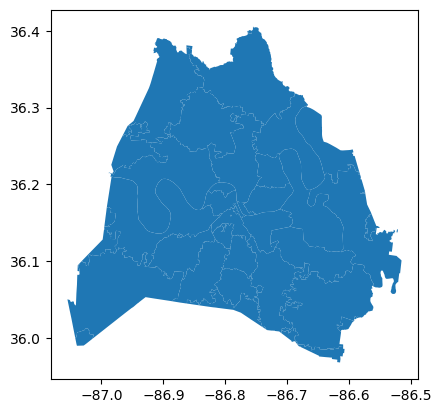

In [8]:
zipcodes.plot()

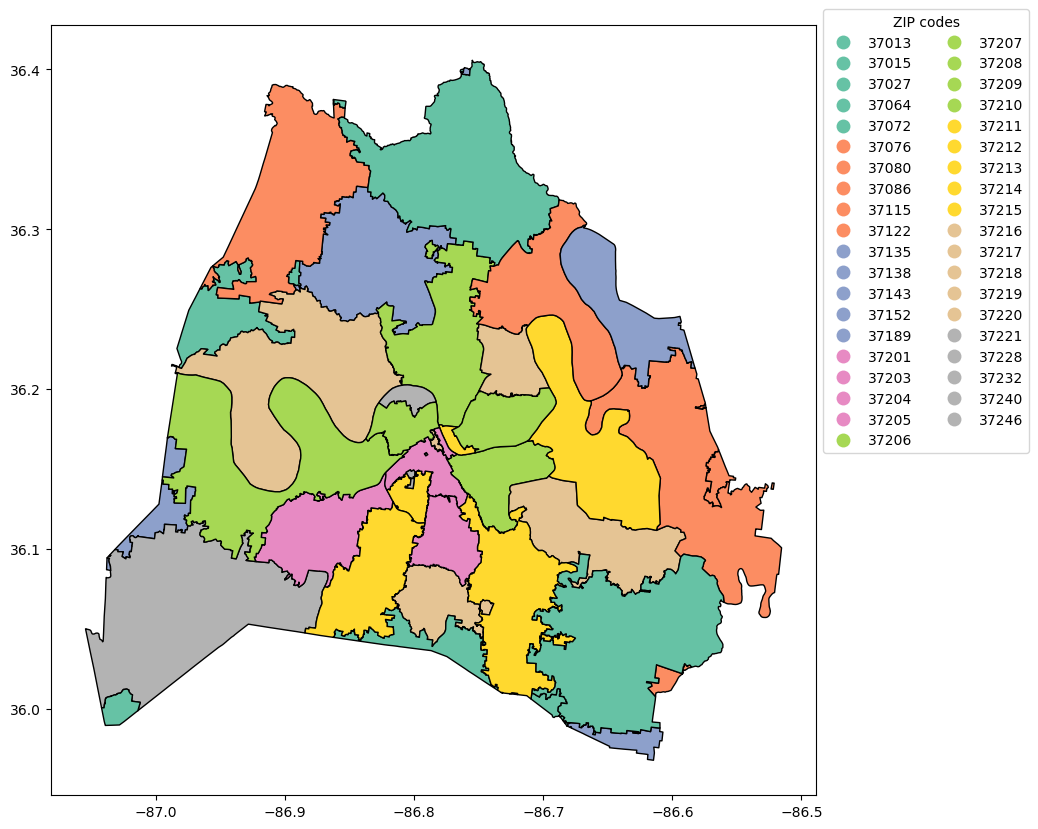

In [9]:
leg_kwds = {'title': 'ZIP codes', 'loc':'upper left',
            'bbox_to_anchor': (1,1.03), 'ncol':2}

zipcodes.plot(column = 'zipcode', figsize=(10,10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds,
              cmap = 'Set2')
plt.show()

In [10]:
public_water = pd.read_csv('../data/water_csv.csv')
print(public_water.shape)
public_water.head(3)

(73, 10)


,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y


In [11]:
public_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  73 non-null     object 
 1   OBJECTID  73 non-null     int64  
 2   LAT       73 non-null     float64
 3   NAME      73 non-null     object 
 4   LON       73 non-null     float64
 5   Location  65 non-null     object 
 6   Dog       73 non-null     object 
 7   FeatType  73 non-null     object 
 8   Cnt       73 non-null     int64  
 9   ADA       73 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.8+ KB


In [12]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
public_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  73 non-null     object 
 1   OBJECTID  73 non-null     int64  
 2   LAT       73 non-null     float64
 3   NAME      73 non-null     object 
 4   LON       73 non-null     float64
 5   Location  65 non-null     object 
 6   Dog       73 non-null     object 
 7   FeatType  73 non-null     object 
 8   Cnt       73 non-null     int64  
 9   ADA       73 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.8+ KB


In [14]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   zipcode   57 non-null     object  
 1   poname    57 non-null     object  
 2   geometry  57 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.5+ KB


In [19]:
# geometry = the_geom
# crs part is important (since public_water is csv)
# geometry= public_water.the_the geom or just the_geom
public_water_geo = gpd.GeoDataFrame(public_water,
                                    crs = zipcodes.crs,
                                    geometry = gpd.points_from_xy(public_water.LAT, public_water.LON))

In [20]:
public_water_geo.head()

,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA,geometry
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y,POINT (-86.89425 36.26250)
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y,POINT (-86.90623 36.06090)
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y,POINT (-86.86728 36.08310)
3,POINT (-86.8637899391243 36.161795831166906),45992,-86.863790,West Park Water Fountain,36.161796,Ballfield,N,Single with foot pedal,1,N,POINT (-86.86379 36.16180)
4,POINT (-86.84589094125035 36.151393836128406),46012,-86.845891,Richland Park Water Fountain,36.151394,Playground,N,Single with foot pedal,1,N,POINT (-86.84589 36.15139)


In [22]:
public_water_by_zip = gpd.sjoin(public_water_geo, zipcodes, predicate = 'within')
plt.show()

In [24]:
public_water_by_zip.head()

,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA,geometry,index_right,zipcode,poname
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y,POINT (-86.89425 36.26250),10,37080,JOELTON
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y,POINT (-86.90623 36.06090),16,37221,NASHVILLE
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y,POINT (-86.86728 36.08310),16,37221,NASHVILLE
29,POINT (-86.90162012078665 36.05195561783142),46595,-86.901620,Edwin Warner Dog Park Water Fountain,36.051956,Dog Park,Y,Dog Only,1,N,POINT (-86.90162 36.05196),16,37221,NASHVILLE
30,POINT (-86.89817440030933 36.049983457233566),46597,-86.898174,Edwin Warner Concession Water Fountain,36.049983,WNSL Concessions,N,Standard/ADA,1,Y,POINT (-86.89817 36.04998),16,37221,NASHVILLE


In [27]:
public_water_by_zip = public_water_by_zip[['NAME','Location','Dog','FeatType', 'ADA','geometry','index_right','zipcode','poname']]
public_water_by_zip.head(3)

,NAME,Location,Dog,FeatType,ADA,geometry,index_right,zipcode,poname
0,Beaman Water Fountain,NaN,Y,Fountain/Bottle filler/ADA,Y,POINT (-86.89425 36.26250),10,37080,JOELTON
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,Bottle Filler/ADA,Y,POINT (-86.90623 36.06090),16,37221,NASHVILLE
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,ADA Bowl,Y,POINT (-86.86728 36.08310),16,37221,NASHVILLE


In [28]:
public_water_by_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 72 entries, 0 to 54
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NAME         72 non-null     object  
 1   Location     64 non-null     object  
 2   Dog          72 non-null     object  
 3   FeatType     72 non-null     object  
 4   ADA          72 non-null     object  
 5   geometry     72 non-null     geometry
 6   index_right  72 non-null     int64   
 7   zipcode      72 non-null     object  
 8   poname       72 non-null     object  
dtypes: geometry(1), int64(1), object(7)
memory usage: 5.6+ KB


In [29]:
public_water_by_zip['zipcode'].value_counts()

zipcode
37209    8
37221    8
37201    6
37206    6
37208    5
37207    5
37013    4
37212    3
37214    3
37218    3
37210    2
37205    2
37213    2
37228    2
37204    2
37217    2
37211    2
37203    2
37076    1
37216    1
37115    1
37215    1
37080    1
Name: count, dtype: int64